<a href="https://colab.research.google.com/github/gabriel1997castro/controlSystems/blob/master/control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -U control qtpy;

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import control as ctrl
from control.matlab import *
import scipy.linalg as la
import scipy.signal as sps

## Matrizes do sistema

In [15]:
A = [[0, 1], [-2, -3]]
B = [[0], [1]]
C = [[2, 0]]
D = [[0]]

## Declaração do sistema

In [16]:
sys = ss(A, B, C, D)

## Resposta ao degrau

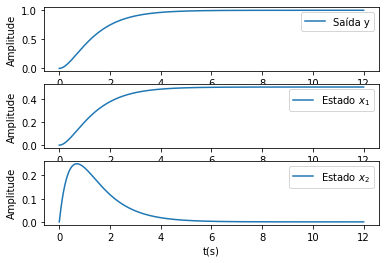

In [19]:
t = np.linspace(0, 12, 1000)
y1, t1, x1 = step(sys, t, return_x=True)
plt.figure()
plt.subplot(3,1,1)
plt.plot(t1, y1)
plt.legend(['Saída y'])
plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.plot(t1, x1[:,0])
plt.legend(['Estado $x_1$'])
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
plt.plot(t1, x1[:,1])
plt.legend(['Estado $x_2$'])
plt.ylabel('Amplitude')
plt.xlabel('t(s)')
plt.show()

## Função de tranferência

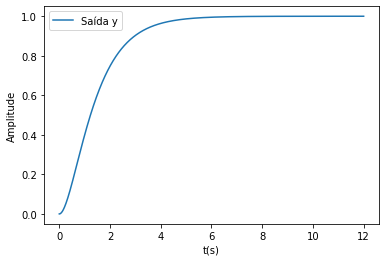

In [32]:
# podemos definir ft usando tf(num, dem) também
num = 2
den = [1, 3, 2]
G = tf(num, den)
##########################################
G = ss2tf(sys)
y2, t2 = step(G, t)
plt.figure()
plt.plot(t2, y2)
plt.legend(['Saída y'])
plt.ylabel('Amplitude')
plt.xlabel('t(s)')
plt.show()

## Autovalores usando o modelo em espaço de estados

In [22]:
print(la.eigvals(A))

[-1.+0.j -2.+0.j]


## Polos da função de transfência

In [23]:
print(pole(G))

[-2. -1.]


## Coverter de função de transferência para espaço de estados

In [27]:
sys1 = tf2ss(G)
print(sys1)
print(la.eigvals(sys1.A))

A = [[-3. -2.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[0. 2.]]

D = [[0.]]

[-2.+0.j -1.+0.j]


## Da forma controlável para a forma observável

In [30]:
sys2 = ss(np.transpose(sys1.A), np.transpose(sys1.C), np.transpose(sys.B), D)
print(sys2)

A = [[-3.  1.]
     [-2.  0.]]

B = [[0.]
     [2.]]

C = [[0. 1.]]

D = [[0.]]



## Expansão em frações parciais

In [34]:
Res, Polos, k = sps.residue(num, den)
print(Res)
print(Polos)

[ 2. -2.]
[-1. -2.]


## Autovalores e autovetores

In [35]:
aVal, aVet = la.eig(A)
print(aVal)
print(aVet)

[-1.+0.j -2.+0.j]
[[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


## Para multiplicar matrizes é necessário usar np.array e o operador @

In [37]:
print(np.array(A) @ np.array(B))

[[ 1]
 [-3]]


## Matriz de controlabilidade

In [39]:
print(ctrb(A, B))

[[ 0.  1.]
 [ 1. -3.]]


## Matriz de observabilidade

In [40]:
print(obsv(A, C))

[[2. 0.]
 [0. 2.]]
